In [11]:
import numpy as np
from fuction import *
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split

# Carregar as labels
labels_path = "C:/Users/Oibug/Desktop/gubio/MachineLearning/FingerPrint/dataset/label_train.npy"
labels      = np.load(labels_path)
labels_subset = labels[:160]

# Carregar o dataset completo
root_data   = "C:/Users/Oibug/Desktop/gubio/MachineLearning/FingerPrint/dataset/train_data"
dataset= CustomImageDataset(root_dir=root_data, labels=labels_subset)

# Dividir o dataset em treino (30%) e teste (70%) de forma estratificada
indices = list(range(len(dataset)))

train_indices, test_indices = train_test_split(indices, test_size=0.2, stratify=labels_subset)

train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

train_dataloader = DataLoader(train_dataset, batch_size=30)
test_dataloader = DataLoader(test_dataset, batch_size=1)

100%|██████████| 1000/1000 [02:17<00:00,  7.27it/s]


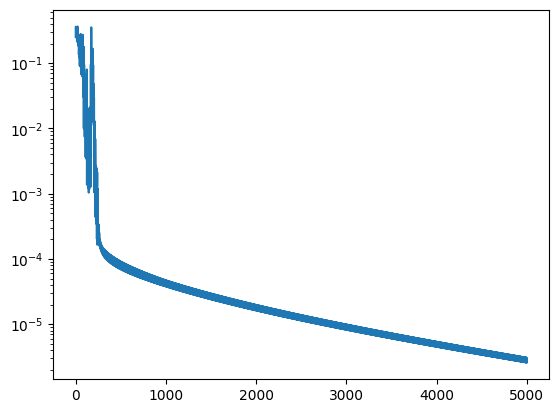

In [12]:

device ="cuda"
# Configurar o modelo
model   = FingerEncoder(neck=1).to(device)  # Ajuste o parâmetro 'neck' conforme necessário

criterion = nn.BCEWithLogitsLoss()  # nn.L1Loss()#nn.MSELoss()
optimizer = tc.optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=300, gamma=0.9)

epochs =1000
model.train()
losses = []
for epoch in tqdm(range(epochs)):
    for _, (data, label) in enumerate(train_dataloader):
        data    = data.to(device)  # Move data to GPU
        label   = label.to(device)  # Move data to GPU
        optimizer.zero_grad()
        
        outputs = model(data)
        loss    = tc.mean((outputs-label)**2)

        loss.backward()
        optimizer.step()
        #scheduler.step()
        losses.append(loss.item())
plt.plot(losses)
plt.yscale("log")
plt.show()

In [21]:
outputs-label

tensor([0.], device='cuda:0', grad_fn=<SubBackward0>)

In [16]:
count = 0
binario = tc.nn.Threshold(0.5,0)
for _, (data, label) in enumerate(test_dataset):
    data    = data.to(device)  # Move data to GPU
    label   = label.to(device)  # Move data to GPU
    outputs = binario(model(data))[0]
    if (outputs[0]==label[0])==True:
        count+=1
print("acerto:",count/len(test_dataset))
count

acerto: 0.28125


9

In [19]:
count = 0
binario = tc.nn.Threshold(0.5,0)
conT=0
for _, (data, label) in enumerate(train_dataset):
    data    = data.to(device)  # Move data to GPU
    label   = label.to(device)  # Move data to GPU
    outputs = binario(model(data))[0]
    conT    +=1
    
    if (outputs[0]==label[0])==True:
        count+=1
print("acerto:",count/len(train_dataset))
count

acerto: 0.5


64

In [20]:
conT

128